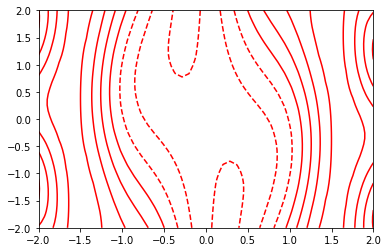

In [1]:
import numpy as np
from derivadas import Grad, Hess, cuadrados
import matplotlib.pyplot as plt

def obtener_derivadas(f, xk, gk='', Bk=''):
    if gk == '':
        gk = Grad(f, xk)
    if Bk == '':
        Bk = Hess(f, xk)
    return gk, Bk


def mk(f, xk, pk, gk='', Bk=''):
    gk, Bk = obtener_derivadas(f, xk, gk, Bk) 
    print(gk)
    print(Bk)
    return f(xk) + np.dot(gk, pk) + np.dot(np.dot(pk,Bk), pk)/2

## mk es ~ f(xk+pk)

def punto_cauchy(f, xk, deltak, gk='', Bk=''):  
    tauk = 1
    gk, Bk = obtener_derivadas(f, xk, gk, Bk) 
    cuadratica = np.dot(np.dot(gk,Bk), gk)
    if  cuadratica > 0:
        mintau = np.dot(gk,gk)**(3/2)/(deltak*cuadratica) 
        if mintau <1:
            tauk = mintau
    return -tauk * deltak * gk / (np.dot(gk,gk)**(1/2))


def f(x):
    return np.sin(x[0]) ** 10 + np.cos(10 + x[1] * x[0]) * np.cos(x[0])


x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 40)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])
plt.contour(X, Y, Z, colors='red');


In [4]:
print(punto_cauchy(cuadrados, [0,1,1,0], 100))

[[ 0.         -0.33326668 -0.33326668  0.        ]]


In [5]:
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 40)
X, Y = np.meshgrid(x, y)
Z = mk(f,[0,0],[X, Y])
plt.contour(X, Y, Z, colors='black')

[0. 0.]
[[0.83907152 0.54402116]
 [0.54402116 0.        ]]


ValueError: shapes (2,) and (2,40,50) not aligned: 2 (dim 0) != 40 (dim 1)

In [6]:
def f(x):
    return np.sin(x[0]) ** 10 + np.cos(10 + x[1] * x[0]) * np.cos(x[0])

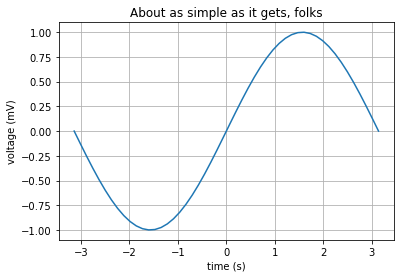

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-np.pi, np.pi, 50)
s = np.sin(x)
fig, ax = plt.subplots()

ax.plot(x,s)
ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

In [11]:
x = np.linspace(-2, 2, 50)
x

array([-2.        , -1.91836735, -1.83673469, -1.75510204, -1.67346939,
       -1.59183673, -1.51020408, -1.42857143, -1.34693878, -1.26530612,
       -1.18367347, -1.10204082, -1.02040816, -0.93877551, -0.85714286,
       -0.7755102 , -0.69387755, -0.6122449 , -0.53061224, -0.44897959,
       -0.36734694, -0.28571429, -0.20408163, -0.12244898, -0.04081633,
        0.04081633,  0.12244898,  0.20408163,  0.28571429,  0.36734694,
        0.44897959,  0.53061224,  0.6122449 ,  0.69387755,  0.7755102 ,
        0.85714286,  0.93877551,  1.02040816,  1.10204082,  1.18367347,
        1.26530612,  1.34693878,  1.42857143,  1.51020408,  1.59183673,
        1.67346939,  1.75510204,  1.83673469,  1.91836735,  2.        ])

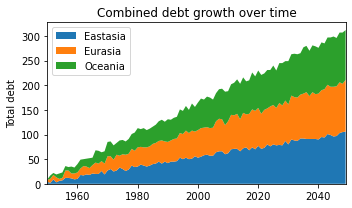

In [35]:
rng = np.arange(100)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

fig, ax = plt.subplots(figsize=(5, 3))
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()